<div class= "alert alert-info" role="alert">
    <p style="text-align:center">
    </a>
</p>   
 <h1><center>Principal Component Analysis (PCA)</center></h1>
<hr></hr>
</div>

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to analyze and visualize high-dimensional data. It is commonly used in machine learning and data analysis tasks to transform a dataset with many correlated variables into a smaller set of uncorrelated variables called principal components.

PCA can be used for a variety of purposes, such as:

1. **Dimensionality reduction**: PCA can help reduce the number of variables in a dataset while retaining most of the important information. This is especially useful when dealing with datasets that have many features, as it can help simplify the data and make it easier to analyze.

2. **Data visualization**: PCA can be used to project high-dimensional data onto a lower-dimensional space, typically a 2D or 3D space, making it easier to visualize and interpret the data. This can be helpful for exploratory data analysis and data visualization tasks.

3. **Feature extraction**: PCA can be used to extract important features from a dataset by identifying the most influential variables that contribute to the principal components. These extracted features can then be used as input for machine learning algorithms.

### How PCA Works

PCA works by finding the directions of maximum variance in the data and projecting the data points onto these directions, which are called the principal components. The first principal component is the direction of maximum variance, the second principal component is the direction of maximum variance orthogonal to the first principal component, and so on.

The steps to perform PCA are as follows:

1. **Data normalization**: PCA is sensitive to the scale of the input data, so it's important to normalize the data before applying PCA. This typically involves centering the data (subtracting the mean) and scaling it (dividing by the standard deviation).

2. **Covariance matrix computation**: PCA computes the covariance matrix of the normalized data, which describes the variance and covariance between the variables.

3. **Eigenvector and eigenvalue computation**: PCA computes the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues represent the amount of variance explained by each eigenvector.

4. **Principal component projection**: PCA projects the data points onto the eigenvectors to obtain the principal components. The data points are projected onto the eigenvectors by taking the dot product between the data points and the eigenvectors.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

**Read in the data and perform basic exploratory analysis**

In [2]:
df = pd.read_csv('wine.csv')
df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
df.iloc[:,1:].describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Boxplots by output labels/classes:**

Text(0.5, 0, 'Wine Class')

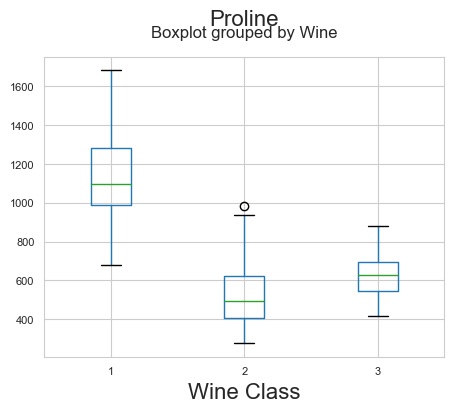

In [24]:
df.boxplot(c,by='Wine',figsize=(5,4),fontsize=8)
plt.title("{}\n".format(c),fontsize=16)
plt.xlabel("Wine Class", fontsize=16)

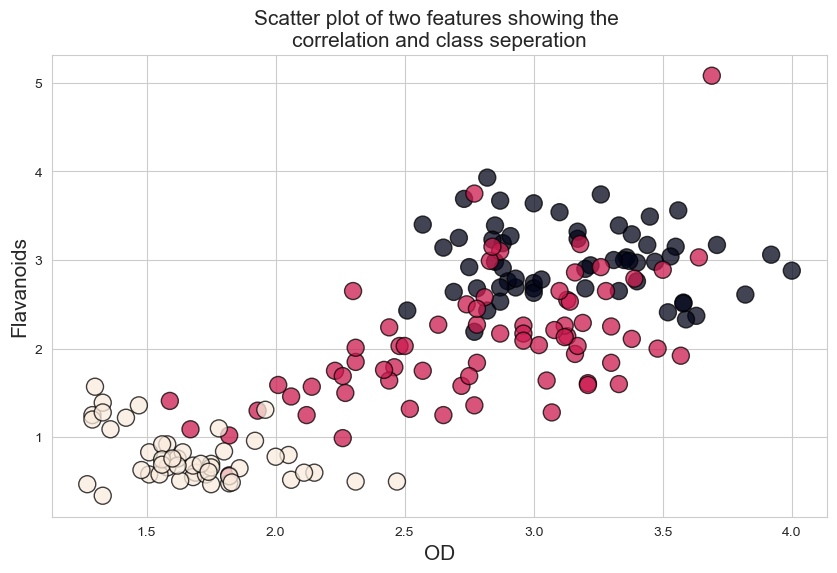

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD'],df['Flavanoids'],c=df['Wine'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

2023-04-08 11:09:35,368 [22964] WARNING  py.warnings:109: [JupyterRequire] C:\Users\avish\AppData\Local\Temp\ipykernel_22964\2618353917.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)

2023-04-08 11:09:35,375 [22964] WARNING  py.warnings:109: [JupyterRequire] C:\Users\avish\AppData\Local\Temp\ipykernel_22964\2618353917.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)



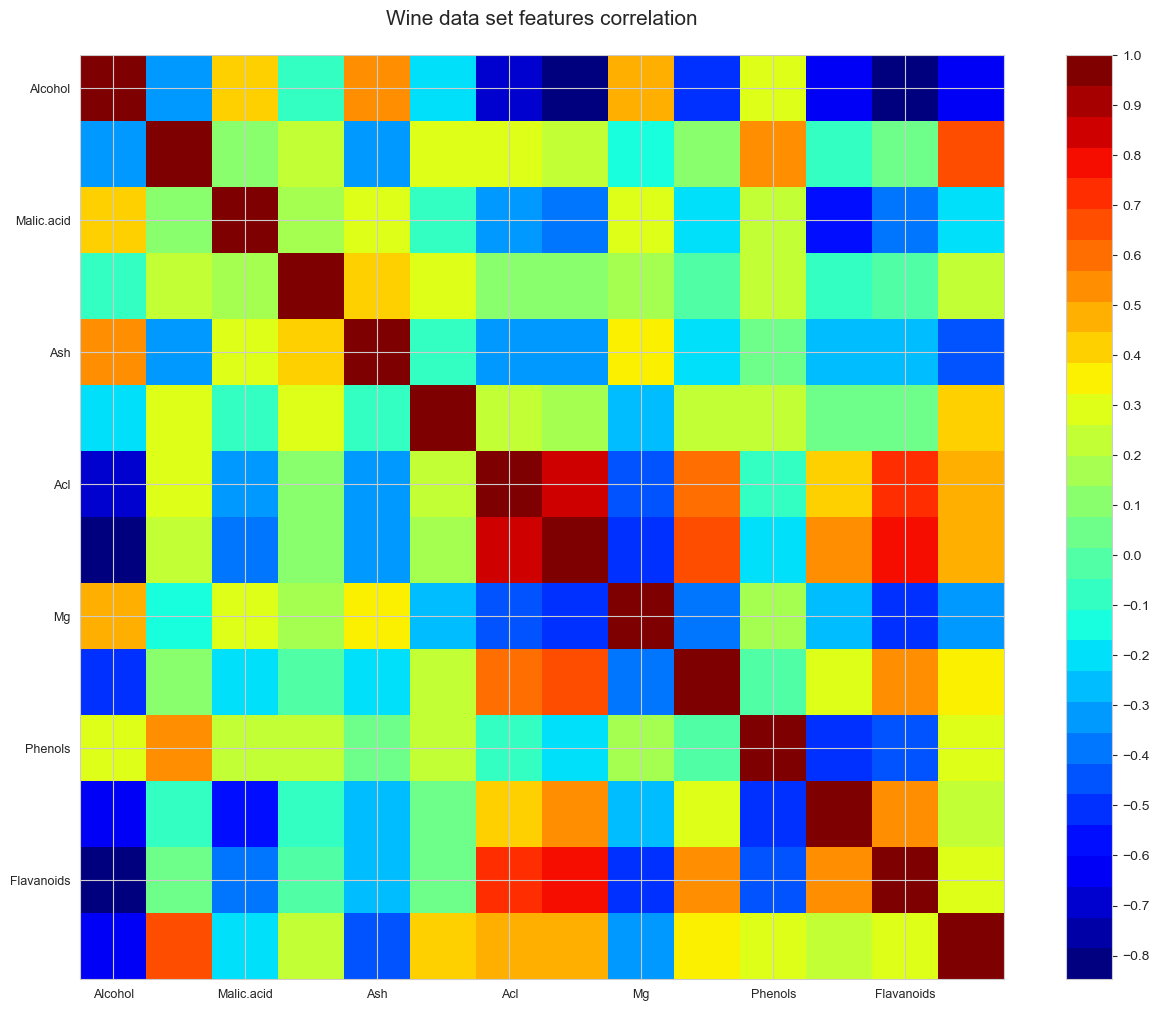

In [9]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

<h1>Principal Component Analysis<h1>

**Data scaling**<br>
PCA requires scaling/normalization of the data to work properly

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X = df.drop('Wine',axis=1)
y = df['Wine']

In [13]:
X = scaler.fit_transform(X)

In [14]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [15]:
dfx.head(10)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


<h1>PCA class import and analysis<h1>

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

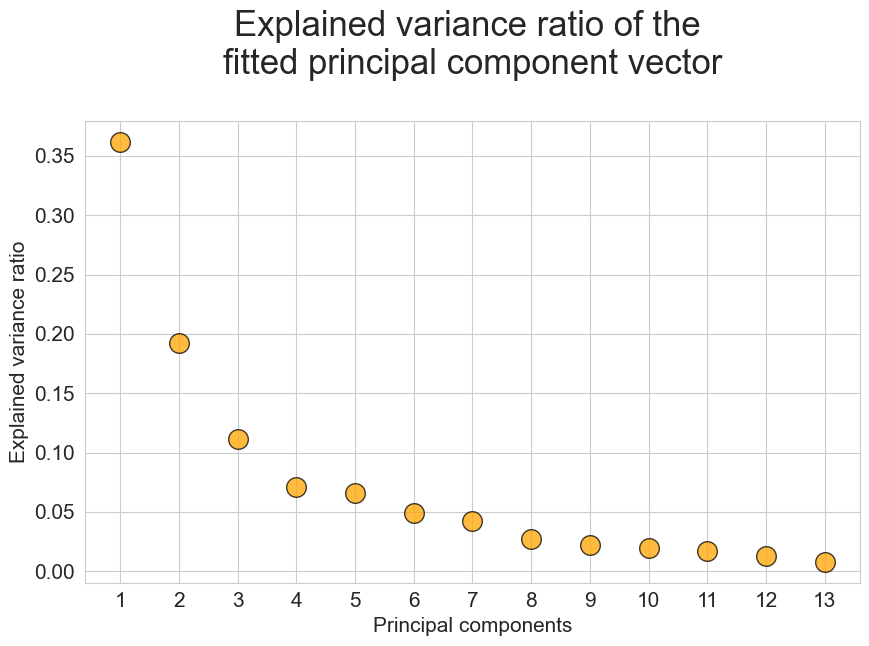

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 
 principal component explains about 36% of the total variance in the data and the 
 component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.

Showing better class separation using principal components

**Transform the scaled data set using the fitted PCA object**

In [18]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


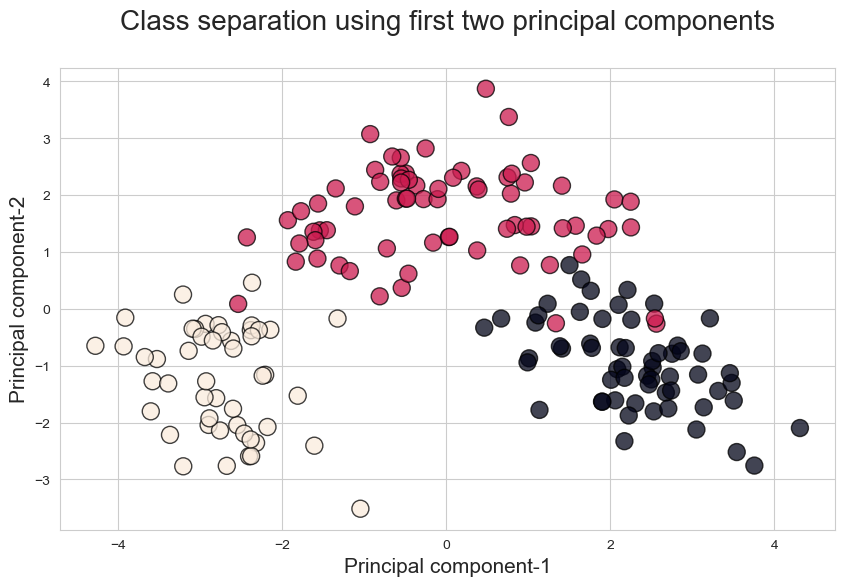

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Wine'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()